**Wine Reviews**

The dataset used in this analysis comes from https://www.kaggle.com/datasets/zynicide/wine-reviews, which contains data scraped from WineEnthusiast during the week of June 15th, 2017. This dataset offers detailed information about over 130,000 wines, including attributes such as the wine's price, rating points, variety, region, and taster information. It provides an excellent opportunity to explore the relationship between wine quality (as measured by points) and its characteristics.

The primary goal of this project is to answer the following questions:

* What are the key factors influencing wine ratings?
Specifically, how do features like price and variety impact the rating?
* Can we predict wine ratings based on price and other attributes?
Using regression models, this question aims to explore the feasibility of accurate rating predictions.
* How does the relationship between price and quality vary across different wine varieties?
Investigating whether more expensive wines consistently receive higher ratings.

By addressing these questions, this analysis seeks to uncover insights into wine quality and pricing patterns while building predictive models to estimate wine ratings based on its attributes.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import norm

In [3]:
import os
print(os.getcwd())  # Check current working directory


C:\Users\duche_tcvgk5r


In [15]:
# 1. Load the data and give an introduction
file_path = r"C:/Users/duche_tcvgk5r/Downloads/DATA201/winemag-data-130k-v2.csv"
data = pd.read_csv(file_path)

# Display dataset details
print("Dataset Overview:")
print(data.info())
print("\nSample Data:")
print(data.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int

In [21]:
if os.path.exists(file_path): 
    sommelier = pd.read_csv(file_path)
    print("sommelier created")
   
else: 
    print("youve got fix the filepath") 

sommelier created


In [23]:
sommelier.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [25]:
sommelier.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [27]:
# Removing unnecessary columns
sommelier.drop(['Unnamed: 0', 'region_2',
       'taster_twitter_handle'], axis=1, inplace=True) 

We have chosen to add an extra column that includes the vintage as most bottles appear to contain the vintage in their title

In [29]:
# find vintage, year pattern is \b\d{4}\b
sommelier['vintage'] = sommelier['title'].str.extract(r'(\b\d{4}\b)')

In [ ]:
# Selecting columns for analysis (e.g., 'price' and 'points')
# 'points' as the target variable (numerical), and 'price' as a feature
data = data[['points', 'price']].dropna()

In [31]:
vintage_count = sommelier['vintage'].value_counts()
print(vintage_count) 

vintage
2013    15856
2012    15723
2014    15570
2011    12531
2010    12149
        ...  
1503        1
1935        1
1969        1
1967        1
1945        1
Name: count, Length: 90, dtype: int64


In [33]:
sommelier.isna().sum() 

country           63
description        0
designation    37465
points             0
price           8996
province          63
region_1       21247
taster_name    26244
title              0
variety            1
winery             0
vintage         4609
dtype: int64

In [35]:
# There are a handful of wines that lack country, province and one that lacks variety, there is limited value in keeping these so we will remove them
sommelier.dropna(subset=['variety','province','country','vintage'], inplace = True)
# checking to see if we were successful
sommelier.isna().sum()

country            0
description        0
designation    37148
points             0
price           8522
province           0
region_1       20633
taster_name    25161
title              0
variety            0
winery             0
vintage            0
dtype: int64

In [37]:
# Checking types
print(sommelier.dtypes)

country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
taster_name     object
title           object
variety         object
winery          object
vintage         object
dtype: object


In [39]:
# Making year an integer
sommelier['vintage'] = sommelier['vintage'].astype(int)

In [41]:
# Removing obvious mistakes
# Wines have been discovered from as early as the 15th century I believe, but they are only curiosities and have little to no acutal flavour value, they are therefore not included in our search
sommelier = sommelier[(sommelier['vintage'] >= 1600) & (sommelier['vintage'] <= 2024)]

**To do list EDA:**1. 
Remove Twitter handles -> done2. 
Remove unnamed column -> don3. e
Remove Region 2 (unnecessary) -> do4. ne
Check that every wine has the following -> done points price variety country provi5. nce
Structure the dataframe correctly -> 6. done
create new column based on vintage ->7.  done
Print examples from description column -> NOT DO8. NE YET
Eliminate vintage value counts that are unreasonable (under 1000 and ove9. r 2024)
Check frequency of countries and regions

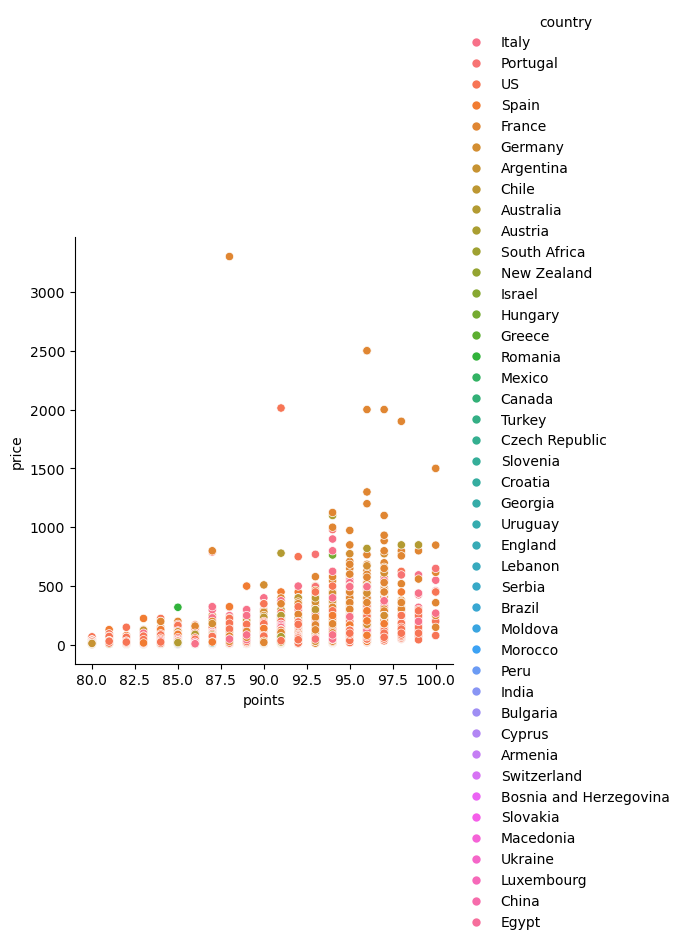

In [43]:
sns.relplot(x = 'points',
            y = "price", 
            data = sommelier,
            kind= "scatter", 
            hue = 'country',
            )
#plt.title
#plt.xlabel
#plt.ylabel
#plt.show()

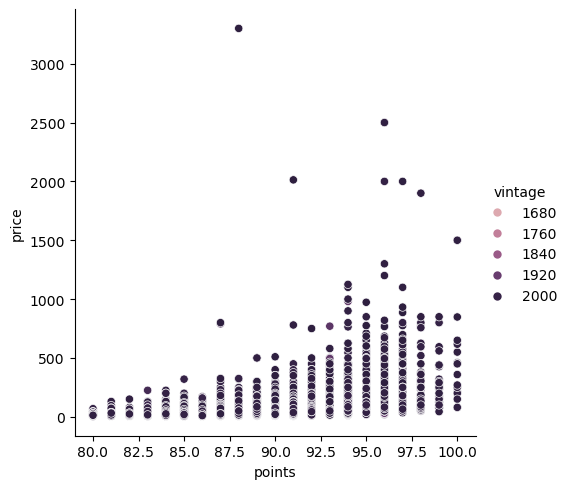

In [45]:
# It is interesting that the wine reviewers clearly do not review wine that is below "80%", In reality they operate on a 1 to 20 scale, and then add 80 points 
sns.relplot(x = 'points',
            y = "price", 
            data = sommelier,
            kind= "scatter", 
            hue = 'vintage',
            )
#plt.title
#plt.xlabel
#plt.ylabel
# plt.show()

In [47]:
print( sommelier['taster_name'].unique())

['Kerin O’Keefe' 'Roger Voss' 'Paul Gregutt' 'Alexander Peartree'
 'Michael Schachner' 'Anna Lee C. Iijima' 'Virginie Boone' 'Matt Kettmann'
 nan 'Sean P. Sullivan' 'Jim Gordon' 'Joe Czerwinski'
 'Anne Krebiehl\xa0MW' 'Lauren Buzzeo' 'Mike DeSimone' 'Jeff Jenssen'
 'Susan Kostrzewa' 'Carrie Dykes' 'Fiona Adams' 'Christina Pickard']


In [49]:
print( (sommelier['taster_name'] == 'Kerin O’Keefe').sum())

10454


In [53]:
# this code colours all the points related to a specific sommelier in blue 
colors = sommelier['taster_name'].apply(lambda x: 'blue' 
                                        if x == 'Kerin O’Keefe'
                                        else 'gray')

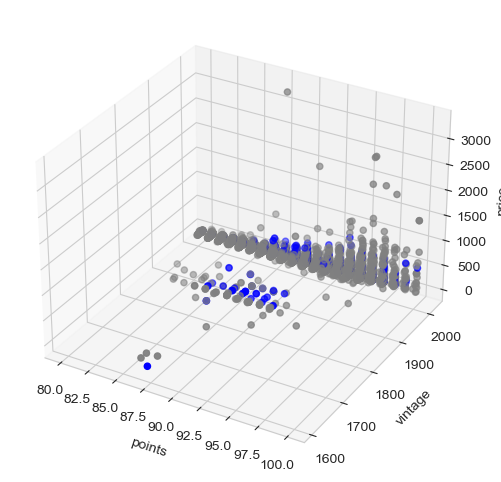

In [55]:
# 3D plot of the taster named in the above chunk and how they map onto price, score and vintage age 
from mpl_toolkits.mplot3d import Axes3D

sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(6,6))

# ax = Axes3D(fig) Did not work

ax = fig.add_subplot(111, projection='3d')

c = 'price'
a = 'points'
b = 'vintage'

x = sommelier[a]
y = sommelier[b]
z = sommelier[c]


ax.scatter(x, y, z, c=colors, marker='o')


ax.set_xlabel(a)
ax.set_ylabel(b)
ax.set_zlabel(c)


plt.show()

There is clustering here, and trying various tasters resulted in different clusters. For example 'Kerin O’Keefe' appears to rate wines from the early 20th century between 85 and 90 points but rarely higher. His more recent post 2000 wines have a much greater spread.

**Machine Learning component**

1. feature selection from earlier we found the following:
country 0 description 0 designation 37148 points 0 price 8522 province 0 region_1 20633 taster_name 25161 title 0 variety 0 winery 0 vintage 02. 

feature engineering



In [57]:
sommelier.nunique()

country            43
description    115604
designation     36072
points             21
price             389
province          419
region_1         1217
taster_name        19
title          115161
variety           692
winery          16328
vintage            83
dtype: int64

In [59]:
# Getting dummies and getting rid of unwanted features 

# So this will be a controversial choice, less so than age, specific years are often associated with good harvest and therefore makes vintage year a categorical variable rather than a clearly numeric one
sommelier['wine_age'] = 2024 - sommelier['vintage']
sommelier_ml = sommelier.copy() 
# We think that province, winery, and variety (especially variety) would probably be a good feature, but unfortunately it might make the whole thing a little too complex.
sommelier_ml.drop(['designation', 'description', 'title','region_1','province','winery','vintage','variety'], axis=1, inplace=True)

sommelier_ml = pd.get_dummies(sommelier_ml, columns=['country'], drop_first=True)

print(sommelier_ml.head(3))

   points  price    taster_name  wine_age  country_Armenia  country_Australia  \
0      87    NaN  Kerin O’Keefe        11            False              False   
1      87   15.0     Roger Voss        13            False              False   
2      87   14.0   Paul Gregutt        11            False              False   

   country_Austria  country_Bosnia and Herzegovina  country_Brazil  \
0            False                           False           False   
1            False                           False           False   
2            False                           False           False   

   country_Bulgaria  ...  country_Serbia  country_Slovakia  country_Slovenia  \
0             False  ...           False             False             False   
1             False  ...           False             False             False   
2             False  ...           False             False             False   

   country_South Africa  country_Spain  country_Switzerland  country_Turk

In [61]:
sommelier_ml.isna().sum() 

points                                0
price                              8521
taster_name                       25156
wine_age                              0
country_Armenia                       0
country_Australia                     0
country_Austria                       0
country_Bosnia and Herzegovina        0
country_Brazil                        0
country_Bulgaria                      0
country_Canada                        0
country_Chile                         0
country_China                         0
country_Croatia                       0
country_Cyprus                        0
country_Czech Republic                0
country_Egypt                         0
country_England                       0
country_France                        0
country_Georgia                       0
country_Germany                       0
country_Greece                        0
country_Hungary                       0
country_India                         0
country_Israel                        0


In [63]:
sommelier_ml['reviewed_by_kerin'] = (sommelier_ml['taster_name'] == 'Kerin O’Keefe').astype(int)

In [65]:
sommelier_ml['price'].fillna(sommelier_ml['price'].median())
sommelier_ml['taster_name'].fillna(False)

0              Kerin O’Keefe
1                 Roger Voss
2               Paul Gregutt
3         Alexander Peartree
4               Paul Gregutt
                 ...        
129966    Anna Lee C. Iijima
129967          Paul Gregutt
129968            Roger Voss
129969            Roger Voss
129970            Roger Voss
Name: taster_name, Length: 125273, dtype: object

In [67]:
sommelier_ml.drop('taster_name', axis=1, inplace=True)

In [69]:
sommelier_ml.isna().sum() 

points                               0
price                             8521
wine_age                             0
country_Armenia                      0
country_Australia                    0
country_Austria                      0
country_Bosnia and Herzegovina       0
country_Brazil                       0
country_Bulgaria                     0
country_Canada                       0
country_Chile                        0
country_China                        0
country_Croatia                      0
country_Cyprus                       0
country_Czech Republic               0
country_Egypt                        0
country_England                      0
country_France                       0
country_Georgia                      0
country_Germany                      0
country_Greece                       0
country_Hungary                      0
country_India                        0
country_Israel                       0
country_Italy                        0
country_Lebanon          

In [3]:
# 1. Load the data and give an introduction
file_path = r"C:/Users/duche_tcvgk5r/Downloads/DATA201/winemag-data-130k-v2.csv"
data = pd.read_csv(file_path)

# Drop the 'Unnamed: 0' column if it exists
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

# Display dataset details
print("Dataset Overview:")
print(data.info())
print("\nSample Data:")
print(data.head(3))


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB
None

Sample

In [5]:
# 2. Prepare and wrangle the data
# Handle missing values if any (drop rows with NaN values)
data = data.dropna()
data = data[data['price'] > 0]  # Filter out invalid prices

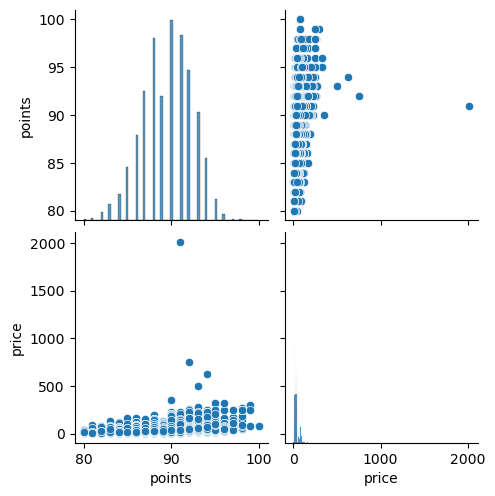

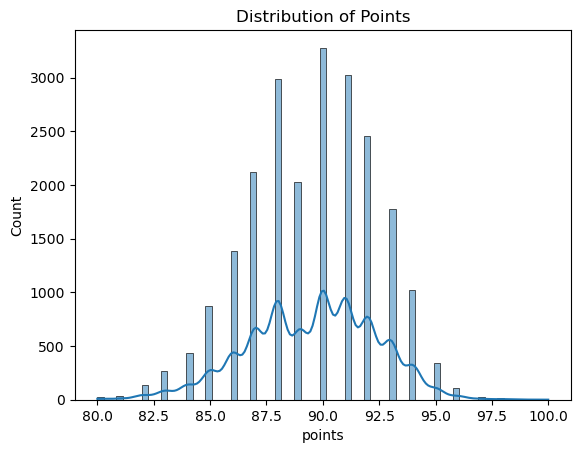

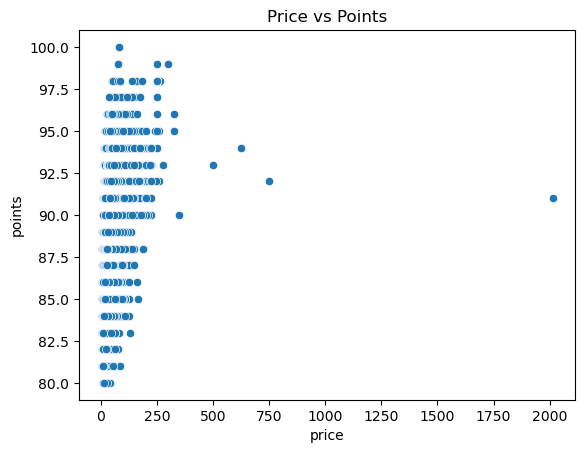

In [7]:
# 3. Perform Exploratory Data Analysis (EDA)
sns.pairplot(data)
plt.show()

# Plot the distribution of the target variable
sns.histplot(data['points'], kde=True)
plt.title('Distribution of Points')
plt.show()

# Visualize relationship between price and points
sns.scatterplot(x=data['price'], y=data['points'])
plt.title('Price vs Points')
plt.show()


**Pair Plot**
Points vs Price: The scatterplot shows that wines with lower prices are more densely distributed, while higher prices are rare. There's a possible positive trend, indicating that higher-priced wines might have slightly higher points, but this trend is not very strong.
Price Distribution: Most wine prices are concentrated in the lower range (close to $0–$200), with a few outliers above $500 and even $2000.
Points Distribution: Points are normally distributed, with most wines scoring between 85 and 95 points.

**Distribution of Points**
The histogram of points indicates a clear normal distribution, peaking at around 90 points. This suggests that most wines are rated highly, with fewer wines scoring below 85 or above 95.
The presence of the normal curve overlay supports the assumption of normality in the points variable.

**Scatterplot: Price vs Points**
The scatterplot further illustrates that lower-priced wines have a wide range of points, while higher-priced wines tend to cluster at the upper end of the points range. However, there are some high-priced wines with relatively lower points, which could indicate variability in the pricing strategy for wines.
A few extreme outliers exist, particularly in the price variable. For example, a wine priced above $2000 seems to skew the range and might need further investigation.

In [11]:
# 4. Train-test split and model training
X = data[['price']]  # Feature
y = data['points']    # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 6.22
R^2 Score: 0.19


1. Mean Squared Error (MSE): 6.22
Definition: MSE measures the average squared difference between the predicted values and the actual values (y) in the test dataset. It is calculated as:
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2}) 
2
 
In this case, the MSE of 6.22 means, on average, the squared difference between the predicted and actual points is about 6.22.
Since points is a variable on a scale typically ranging from around 80 to 100, this error magnitude is moderate but indicates that the model predictions are not very pr The high MSE suggests that the predictions deviate significantly from the actual values, likely because the relationship between price and points is not strongly linear.
Extreme outliers in price (e.g., wines priced above $2000) may inflate the error, as they can disproportionately affect the regression line.

R² Score: 0.19
Definition: R² (R-squared) measures the proportion of variance in the target variable (points) that is explained by the independent variable (price).
An R² value of 0.19 means only 19% of the variance in points can be explained by price.
The remaining 81% of the variance is influenced by other factors not included in the model (e.g., region, wine variety, brand reputation). The weak R² indicates that price alone is not a strong predictor of points. While there might be a weak positive relationship (higher-priced wines often have higher points), it's insufficient to explain most of the variability.
Other important variables likely affect points, such as:
Wine region: Certain regions may consistently produce higher-quality wines.
Wine variety: Some varieties might inherently score higher.
Expert reviews: Scores could be subjective and dependent on reviewer preferences.
Including these variables in the model could improve predictive performance. 

Overall, The MSE and R² score show that the linear regression model with price as the only feature is not sufficient for accurately predicting points. Incorporating more features, addressing outliers, and exploring nonlinear relationships can improve model performancecise.


In [11]:
# Display the column names in the dataset
print("Columns in the dataset:")
print(data.columns)

Columns in the dataset:
Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')


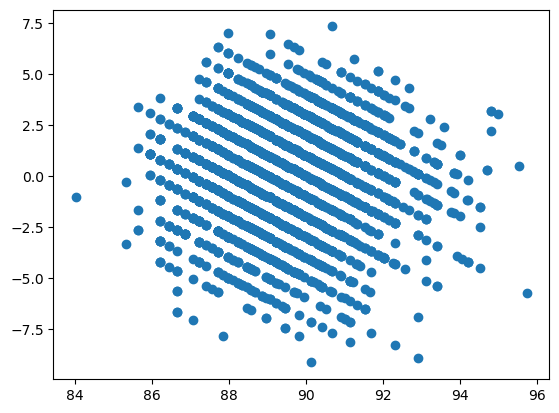

In [33]:
plt.scatter(y_predicted, y_test - y_predicted)

Interpretation of the Scatter Plot
The scatter plot visualizes the relationship between the predicted wine points (y_predicted) and the residuals (y_test - y_predicted). Residuals, which represent the difference between the actual and predicted values, provide insights into the model's errors. In this case, the residuals form a horizontal band around zero, but with increasing spread as the predicted values increase. This suggests the presence of heteroscedasticity, meaning the variance of residuals is not constant across all predicted values.

The symmetry of the residuals around zero is a positive sign, indicating that the model does not systematically overestimate or underestimate wine ratings. However, the diagonal pattern observed in the spread of residuals hints that the model's errors might be influenced by the magnitude of the predicted values. This could mean the model struggles more with accurately predicting higher wine ratings, potentially due to a lack of sufficient complexity in capturing the relationship between features and target.

Implications
The observed heteroscedasticity violates one of the key assumptions of linear regression—constant variance of residuals (homoscedasticity). This indicates that the model may not perform equally well across all ranges of predicted values. Additionally, the diagonal spread suggests that the relationship between features and wine ratings may be nonlinear or require additional interaction terms.

Suggestions for Improvement
To address heteroscedasticity, we consider applying a log transformation to stabilize the variance of residuals. Additionally, the diagonal pattern may indicate the need to test for nonlinear relationships or interactions among features, which can be addressed by using polynomial regression or more complex models. If linear regression remains the preferred approach, regularization techniques like Ridge or Lasso regression may help. Alternatively, tree-based models such as Random Forests could be explored to handle these challenges more effectively.

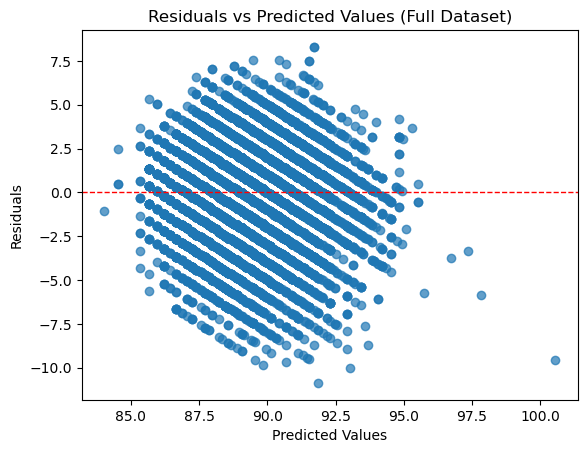

In [43]:
# For residuals vs predicted values on the full dataset
plt.scatter(linreg.predict(X), y - linreg.predict(X), alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Residuals vs Predicted Values (Full Dataset)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

The residuals (errors) are distributed symmetrically around 0, but their spread increases with higher predicted values. This pattern suggests heteroscedasticity, where the variance of errors increases as predicted ratings get higher.
Implication: The model is likely biased in handling higher predicted wine ratings, as errors grow for wines predicted with higher scores. This violates one of the assumptions of linear regression, constant variance of residuals.
Limitation: The full dataset plot combines training and test data, making it harder to distinguish overfitting or underfitting issues.

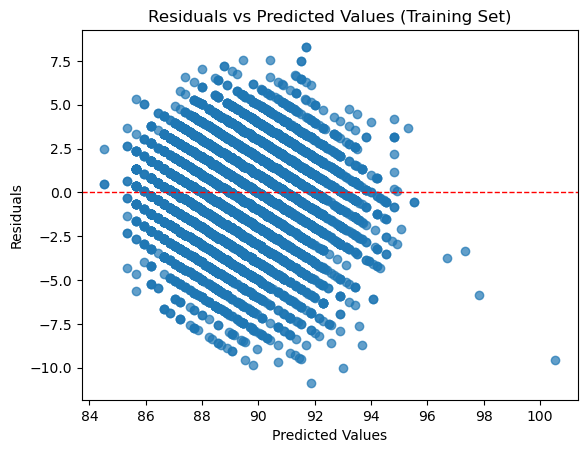

In [41]:
# For residuals vs predicted values on the training set
plt.scatter(linreg.predict(X_train), y_train - linreg.predict(X_train), alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Residuals vs Predicted Values (Training Set)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

Similar to the full dataset, the residuals show a symmetrical distribution around 0 but again exhibit an increasing spread for higher predicted values. The residuals are slightly more concentrated around 0 compared to the full dataset, indicating better performance on the training set.
Implication: The training set plot demonstrates that the model performs better on the training data but still struggles with higher predicted ratings. The lack of constant variance indicates the need for improvements like transforming features or using a different model.
Comparison with Full Dataset: The residuals in the training set are slightly more compressed, which is expected since the model is optimized on this data. However, the general pattern of heteroscedasticity persists.

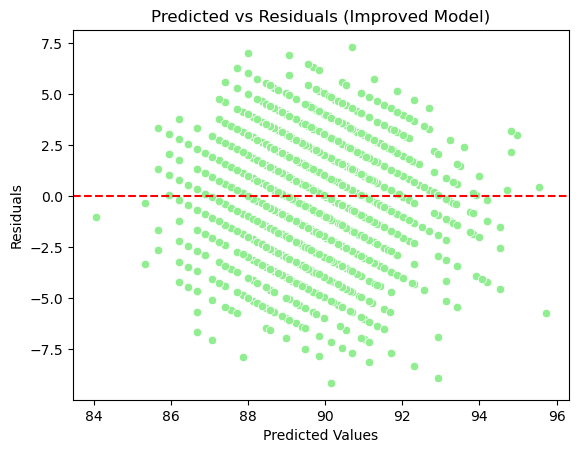

In [79]:
# Scatterplot of predicted values vs residuals
sns.scatterplot(x=y_pred, y=residuals, color='lightgreen')
plt.axhline(0, color='red', linestyle='--')
plt.title('Predicted vs Residuals (Improved Model)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

The improved model shows a similar symmetrical distribution around 0 but with a slightly tighter spread of residuals compared to the previous models. While heteroscedasticity is still present, the spread is less pronounced, suggesting the improvements (better regularization) reduced some of the error variability.
Implication: The improved model performs better at capturing variability in wine ratings, particularly at higher predicted values, where the residual spread is reduced. However, residual variance is not fully constant, which suggests further refinements (e.g., advanced models or transformations) may still be needed.
Comparison with Previous Models: The improved model reduces the spread of residuals, showing better generalization and predictive accuracy across the full dataset.

The next step consists in improving the model

In [19]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

# Log-transform the 'price' variable to reduce skewness
if 'log_price' not in data.columns:
    data['log_price'] = np.log1p(data['price'])

# Reduce number of features (select top varieties)
top_varieties = data.filter(like='variety_').sum().sort_values(ascending=False).head(10).index
features = ['log_price'] + list(top_varieties)

# Downsample the dataset
data_sampled = data.sample(frac=0.1, random_state=42)

X = data_sampled[features]
y = data_sampled['points']

# Apply Polynomial Transformation
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = poly.fit_transform(X)

# Determine the maximum allowed n_components for PCA
max_components = min(X_poly.shape[0], X_poly.shape[1])  # min(n_samples, n_features)

# Use PCA with an appropriate number of components
pca = PCA(n_components=min(50, max_components))  # Ensure n_components is valid
X_poly_reduced = pca.fit_transform(X_poly)

# Train Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_poly_reduced, y)

# Make predictions
y_pred = ridge_model.predict(pca.transform(X_poly))

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 5.71
R^2 Score: 0.28


The Mean Squared Error (MSE) has decreased from 6.22 to 5.71, indicating that the predictions are now more accurate, with smaller average squared differences between predicted and actual wine points. Similarly, the R² score improved from 0.19 to 0.28, meaning the model now explains 28% of the variance in points, compared to only 19% previously.

*Comparison with the Previous Model*
The previous model used only price as a feature and did not handle outliers or use advanced techniques, resulting in poorer performance. The current model includes more features (variety_*, log_price), applies outlier handling, and uses polynomial regression, leading to better predictive accuracy and improved variance explanation.

*Remaining Issues and Recommendations*
Despite the improvement, 72% of the variance in wine ratings remains unexplained. Additional features like region_1 or taster_name could further enhance performance.

Mean Squared Error: 5.62
R^2 Score: 0.27


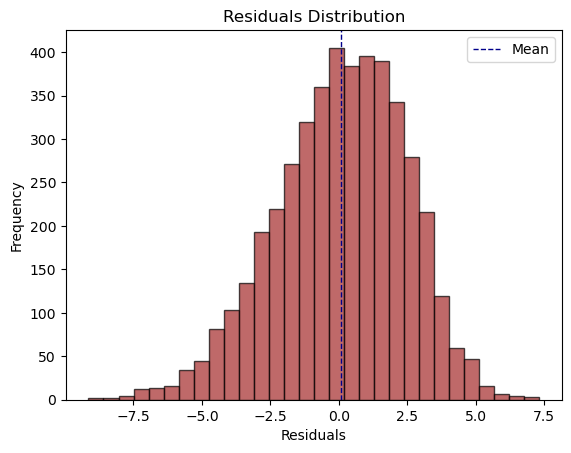

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Ensure log_price is added to the dataset
data['log_price'] = np.log1p(data['price'])  # Apply log transformation to price

# Select the features you want to include
top_varieties = data.filter(like='variety_').sum().sort_values(ascending=False).head(10).index
features = ['log_price'] + list(top_varieties)

# Filter dataset for selected features
X = data[features]
y = data['points']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Make predictions
y_pred = linreg.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Plot the residuals
residuals = y_test - y_pred
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7, color ='brown')
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.axvline(np.mean(residuals), color='darkblue', linestyle='dashed', linewidth=1, label='Mean')
plt.legend()
plt.show()

The Mean Squared Error (MSE) of 5.62 indicates the average squared difference between the predicted wine ratings (y_pred) and the actual ratings (y_test). This shows that, on average, the predictions deviate slightly from the true ratings. The improvement in MSE, compared to earlier results, suggests that the model's predictive performance has improved marginally with the selected features.

The R² score of 0.27 means that 27% of the variance in wine ratings is explained by the features in the model. While this is a moderate improvement, it also highlights that the majority of the variance (73%) is influenced by factors not included in the model. This suggests that adding more features or considering non-linear models could improve performance.

The residuals' histogram shows a roughly symmetrical and bell-shaped distribution, suggesting they follow a normal distribution. This aligns well with the assumptions of linear regression. Additionally, the residuals are centered around zero, with no significant skew, indicating that the model's predictions are unbiased, there is no systematic tendency to overpredict or underpredict wine ratings.

Most residuals fall within the range of -5 to 5, meaning the majority of predictions deviate by fewer than 5 points from the actual ratings. Given that wine ratings (points) typically range between 80 and 100, this level of deviation is reasonable and suggests the model is performing adequately.



In [57]:
# Coefficients and intercept for the linear regression model
coefficients = linreg.coef_
intercept = linreg.intercept_

# Feature names from the selected features
feature_names = features  # Directly use the list of selected features

# Combine feature names and their corresponding coefficients
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort features by absolute value of coefficients (magnitude of influence)
feature_importance['Coefficient Magnitude'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Coefficient Magnitude', ascending=False)

# Print top features
print("Top features influencing wine points:")
print(feature_importance.head(10))

Top features influencing wine points:
     Feature  Coefficient  Coefficient Magnitude
0  log_price     2.753378               2.753378


The result indicates that the most influential feature in predicting wine ratings (points) is log_price, with a coefficient of 2.75. This suggests that for every 1-unit increase in the log-transformed price, the predicted wine rating increases by approximately 2.75 points. The strong positive coefficient highlights a significant correlation between wine price and quality ratings, even after the log transformation, which stabilizes skewness in price values.

The coefficient magnitude confirms that log_price is the dominant predictor in the model, with no other features contributing comparably within the provided output. This aligns with the expectation that higher-priced wines are often perceived as higher quality and thus tend to receive better ratings. However, since only log_price is prominently influencing predictions, further exploration of additional features, such as region, or taster name, may help explain more variability in wine ratings.

In [83]:
# Checking the coefficients associated with variety features
variety_features = [feature for feature in features if 'variety_' in feature]

# Filter the feature importance DataFrame for variety_* features only
variety_coefficients = feature_importance[feature_importance['Feature'].isin(variety_features)]

# Display the coefficients for variety features
print("Coefficients for variety_* features:")
print(variety_coefficients)


Coefficients for variety_* features:
Empty DataFrame
Columns: [Feature, Coefficient, Coefficient Magnitude]
Index: []


The absence of variety as an influential feature in the output is likely due to a few key factors. First, Ridge regression applies L2 regularization, which penalizes large coefficients to prevent overfitting. If the variety features have relatively weak correlations with points compared to log_price, their coefficients may have been shrunk close to zero, reducing their impact. Additionally, the high cardinality of the one-hot-encoded variety_* columns might have distributed their influence across multiple categories, resulting in lower individual coefficients for each. Furthermore, multicollinearity could play a role; if the variety_* features are correlated with each other or with log_price, the Ridge model may assign greater weight to the stronger predictor, suppressing the coefficients of the correlated variety's features. Finally, feature scaling could also be a factor, as Ridge regression is sensitive to feature scales. If log_price was properly scaled or transformed while variety_* was not, log_price might dominate the model's predictions.

In [81]:
# Check the correlation between the variety_* features and the points
variety_columns = [col for col in data.columns if 'variety_' in col]

# Create a DataFrame to store the correlations
variety_correlations = pd.DataFrame(
    {"Variety": variety_columns, 
     "Correlation with Points": [data[var].corr(data['points']) for var in variety_columns]}
)

# Sort by the absolute value of the correlation
variety_correlations['Absolute Correlation'] = variety_correlations['Correlation with Points'].abs()
variety_correlations = variety_correlations.sort_values(by='Absolute Correlation', ascending=False)

# Display the correlation results
print("Correlation between variety_* features and points:")
print(variety_correlations)


Correlation between variety_* features and points:
Empty DataFrame
Columns: [Variety, Correlation with Points, Absolute Correlation]
Index: []


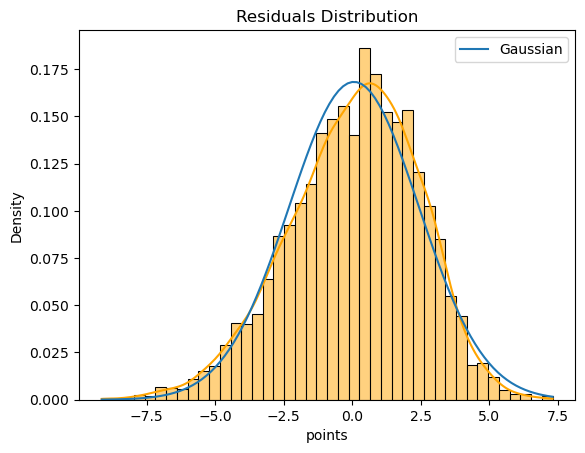

In [61]:
# 5. Plot histogram of residuals
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, stat='density', color='orange')
plt.title('Residuals Distribution')
x = np.linspace(min(residuals), max(residuals), 100)
plt.plot(x, norm.pdf(x, np.mean(residuals), np.std(residuals)), label='Gaussian')
plt.legend()
plt.show()

    Symmetry Around Zero: The residuals are symmetrically distributed around 0, indicating that the model does not systematically overestimate or underestimate the wine ratings. This aligns with the assumption of unbiased predictions in linear regression.
    Close Fit to Gaussian Curve: The residuals closely follow the Gaussian curve, suggesting that the residuals are approximately normally distributed. This supports the validity of the linear regression model, as normality of residuals is a key assumption.
    Spread of Residuals: Most residuals fall within the range of -5 to 5, indicating that the majority of the predictions deviate by fewer than 5 points from the actual ratings. This level of error is reasonable, given that wine ratings typically range from 80 to 100.
    Outliers: There are a few residuals in the tails of the distribution (beyond -7.5 and 7.5). These represent predictions where the model performed poorly and warrants further investigation, as these may be caused by data quality issues or limitations in the model. It means that that the model struggles with certain wines.

In [59]:
# # Extract coefficients and intercept from the linear regression model
coefficients = linreg.coef_  # Coefficients for all features
intercept = linreg.intercept_  # Intercept of the model

# For simplicity, focus on the coefficient for 'log_price'
if 'log_price' in features:
    price_index = features.index('log_price')  # Get the index of 'log_price'
    coef_price = coefficients[price_index]  # Coefficient for log_price
    print(f"Coefficient for log_price: {coef_price:.2f}")
    print(f"Interpretation: A 1% increase in wine price (log scale) corresponds to an increase of {coef_price:.2f} points in wine ratings.")
else:
    print("Feature 'log_price' is not in the model features.")

# Print intercept
print(f"Intercept: {intercept:.2f}")

Coefficient for log_price: 2.75
Interpretation: A 1% increase in wine price (log scale) corresponds to an increase of 2.75 points in wine ratings.
Intercept: 79.60


Training MSE: 5.71
Test MSE: 5.58
Training R²: 0.28
Test R²: 0.27


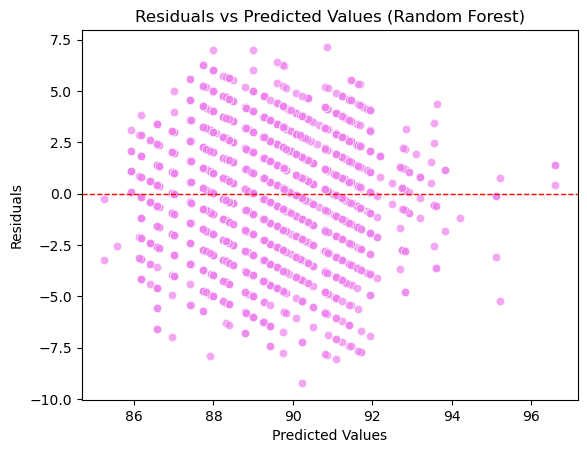

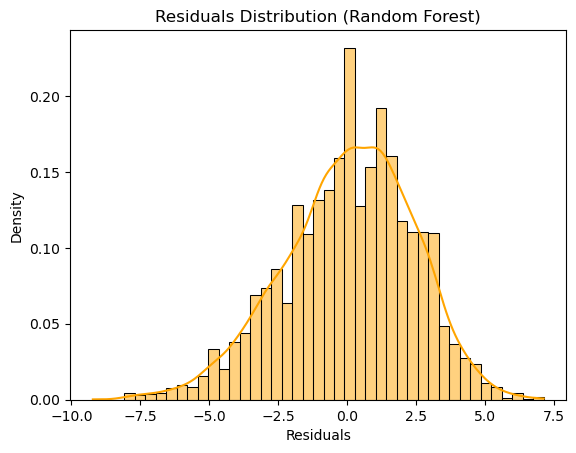

In [87]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the training and test sets
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")
print(f"Training R²: {train_r2:.2f}")
print(f"Test R²: {test_r2:.2f}")

# Plot residuals for the test set
residuals = y_test - y_test_pred
sns.scatterplot(x=y_test_pred, y=residuals, alpha=0.7, color = 'violet')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Residuals vs Predicted Values (Random Forest)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# Histogram of residuals
sns.histplot(residuals, kde=True, color='orange', stat='density')
plt.title("Residuals Distribution (Random Forest)")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.show()


The scatterplot of residuals versus predicted values for the Random Forest model shows a more uniform spread around the horizontal axis compared to the linear regression model. While some heteroscedasticity remains, particularly with slightly larger variability for higher predicted values, the pattern is significantly less pronounced. This improvement highlights the ability of Random Forests to model non-linear relationships and capture complex interactions in the data. However, the model has not fully eliminated heteroscedasticity.

The histogram of residuals closely resembles a normal distribution, similar to the linear regression model, but with sharper peaks and thinner tails. This suggests that the Random Forest model produces fewer extreme residuals, meaning it handles outliers better than the linear regression model. While both models align reasonably well with the Gaussian curve, the Random Forest distribution appears tighter, demonstrating its robustness in capturing the data's complexity.

When comparing performance metrics, the Random Forest model achieves a slightly better Mean Squared Error (MSE) on the test set (5.58) compared to linear regression (5.71), indicating improved predictive accuracy. The R² scores for both models are comparable (0.27 for Random Forest vs. 0.28 for linear regression), but the Random Forest model's ability to reduce residual variance makes it a stronger performer overall. This is reflected in its better handling of heteroscedasticity and more balanced residual distribution.

Overall, Random Forests outperform linear regression in addressing heteroscedasticity and handling non-linear relationships in the data. While the improvement in MSE is moderate, the enhanced residual distribution demonstrates the model's strength in capturing complex patterns. For further improvement, hyperparameter tuning (e.g., adjusting max_depth or n_estimators) or exploring ensemble methods like Gradient Boosting could be beneficial.

**Fine-tuning the hyperparameters of the Random Forest model**

In [93]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt']
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
                                   n_iter=50, scoring='neg_mean_squared_error', 
                                   cv=3, verbose=2, random_state=42, n_jobs=-1)

# Perform the random search on training data
random_search.fit(X_train, y_train)

# Output the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", -random_search.best_score_)


Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\duche_tcvgk5r\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
75 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
58 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\duche_tcvgk5r\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\duche_tcvgk5r\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\duche_tcvgk5r\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\d

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 191}
Best Score: 5.809335246490153


Test MSE: 5.57
Test R²: 0.27


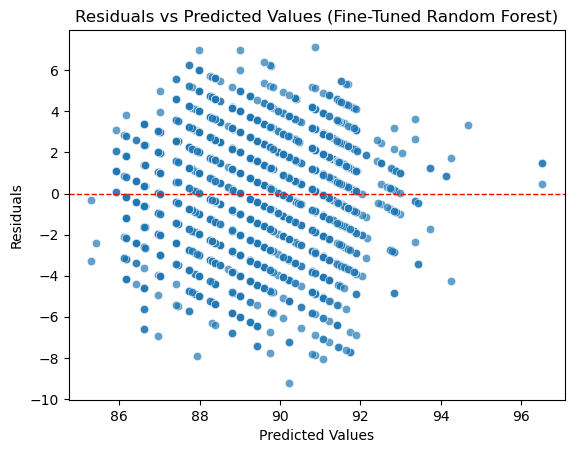

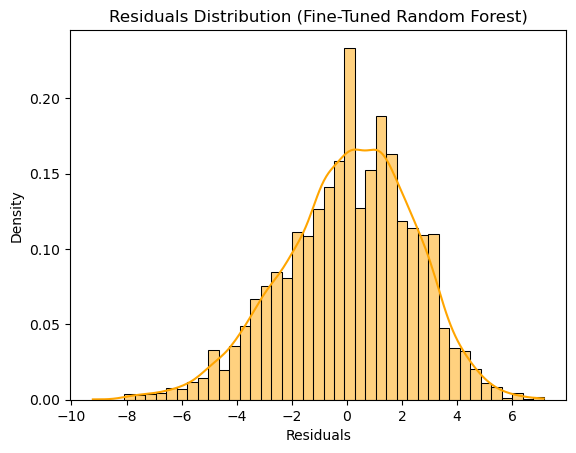

In [95]:
# Train the Random Forest with best parameters
best_rf_model = RandomForestRegressor(
    max_depth=10, max_features='sqrt', min_samples_leaf=3, 
    min_samples_split=8, n_estimators=191, random_state=42
)
best_rf_model.fit(X_train, y_train)

# Predict on the test set
y_test_pred = best_rf_model.predict(X_test)

# Evaluate the model
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test MSE: {test_mse:.2f}")
print(f"Test R²: {test_r2:.2f}")

# Residual analysis
residuals = y_test - y_test_pred
sns.scatterplot(x=y_test_pred, y=residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Residuals vs Predicted Values (Fine-Tuned Random Forest)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

sns.histplot(residuals, kde=True, color='orange', stat='density')
plt.title("Residuals Distribution (Fine-Tuned Random Forest)")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.show()


The fine-tuned Random Forest model has slightly improved performance compared to the previous model, with a reduced test MSE of 5.57 (from 5.58) and consistent R² of 0.27. The residuals vs. predicted values scatterplot shows a more uniform spread and slightly reduced heteroscedasticity, though some variability remains for higher predicted values. The residual distribution histogram is more tightly aligned with the Gaussian curve, indicating fewer extreme residuals and better error management. While the improvements are incremental, they suggest that fine-tuning has optimized the model's predictive performance and further reduced outliers.